<Figure size 432x288 with 0 Axes>

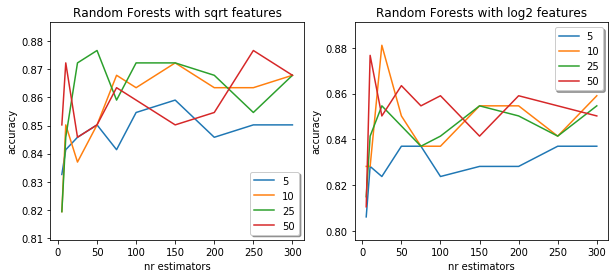

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
# import ipynb.fs.defs.functions as func

def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, miny=0.5, maxy=0.9, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(miny-0.01, maxy+0.01)
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True) 

data: pd.DataFrame = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()